<a href="https://colab.research.google.com/github/jang-jinyeol/Machine_Learning/blob/main/multilayer_perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
다층 퍼셉트론 (multilayer_perceptrons, MLP)은 feed-forward 신경망, 또는 종종 그냥 신경망이라고도 한다.
로 나눈 값을 z-점
////////데이터에서 평균을 빼고 표준편차로 나눈 값을 z-점수(z-score)또는 표준 점수(standard score)라고 한다.
z-점수는 평균이 0, 분산이 1인 표준정규분포이다.//////

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)


mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 예측률 {:.2f}".format(mlp.score(X_train,y_train)))
print("테스트 세트 예측률 {:.2f}".format(mlp.score(X_test,y_test)))


훈련 세트 예측률 0.94
테스트 세트 예측률 0.92


In [ ]:
MLP의 정확도는 꽤 높지만 다른 모델만큼은 아니다. 앞서 SVC 예제에서는 데이터의 스케일이 영향을 미쳤다.
이와 비슷하게 신경망도 모든 입력 특성을 평균은 0, 분산은 1이 되도록 변형하는 것이 좋다.
그럼 이 조건에 맞도록 데이터의 스케일을 맞춰보겠다.
3장에서 이를 자동으로 처리해주는 StandardScaler를 배운다.
여기서는 집접 구현


In [37]:
# 훈련 세트 각 특성의 평균을 계산한다.

mean_on_train = X_train.mean(axis=0)

# 훈련 세트 각 특성의 표준 편차를 계산한다.

std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1인 데이터로 변환된다.

X_train_scaled = (X_train - mean_on_train) / std_on_train

# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 한다.

X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도 {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도 {:.3f}".format(mlp.score(X_test_scaled,y_test)))
"""
스케일을 조정하니 결과가 매우 좋아졌으며 다른 모델의 성능 못지않다.
하지만 최대 반복 횟수에 도달했다고 경고가 뜬다.
이는 모델을 학습시키는 adam 알고리즘에 관련한 것으로 이 경고가 나오면 반복 횟수를 늘려야 한다.
Adam(Adaptive Moment Estimation)알고리즘은 경사 하강법의 학습률(learning rate) 매개변수를 학습이 반복됨에 따라 조정해가는 알고리즘
중 하나이다. MLPClassifier와 MLPRegressor의 solver 매개변수 기본값이 adam이고 max_iter 매개변수의 기본값은 200이다.
"""

훈련 세트 정확도 0.99061
테스트 세트 정확도 0.96503


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [48]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도 {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도 {:.3f}".format(mlp.score(X_test_scaled,y_test)))

"""
반복 횟수를 늘려서 훈련 세트와 테스트 세트의 성능을 올렸다.
모델의 성능은 매우 좋아졌다.
하지만 훈련 세트와 테스트 세트 사이에는 성능 차이가 있으므로 일반화 성능을 더 올리기 위헤 모델의 복잡도를 낮춰보겠다.
여기서는 가중치를 더 강하게 규제하도록 alpha 매개변수를 (0.0001에서 1로 아주 크기) 증가시켜보겠다.
"""

mlp = MLPClassifier(max_iter=1000,alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('\n')
print("훈련 세트 정확도 {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도 {:.3f}".format(mlp.score(X_test_scaled,y_test)))


# 신경망이 어떻게 학습하는지 분석할 수 있지만 선형 모델이나 트리 모델보다는 훨씬 까다롭다.
# 모델의 가중치를 확인해보면 무엇이 학습됐는지 알 수 있다.
# 이와 관련 예제를 scikit-learn 예제에서 볼 수 있다.(http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)
# 유방암 데이터셋 같은 경우는 조금 더 어렵다.
# 아래 그림은 입력과 은닉층 사이의 학습된 가중치를 보여준다. 이 그림의 행은 30개의 입력 특성에 해당하며 열은 100개의 은닉 유닛에 해당한다.
# 밝은 색은 큰 양수 값을 나타내고 어두운 색은 음수 값을 나타낸다.


훈련 세트 정확도 1.000
테스트 세트 정확도 0.972


훈련 세트 정확도 0.988
테스트 세트 정확도 0.972


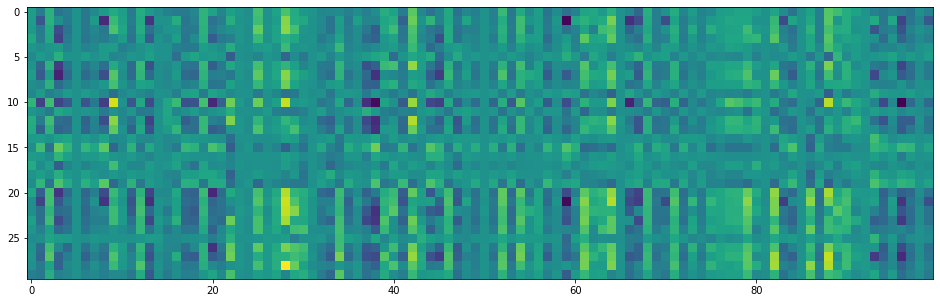

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')

In [23]:
import numpy as np
test1 = [177,167,160,162,174,180,176,158,172,184]

# mean = test1.mean
test1 = np.array(test1)

test1_mean = test1.mean(axis=0)

test1_std=test1.std(axis=0)

print("평균{}".format(test1_mean))
print("표준편차{}".format(test1_std))

평균171.0
표준편차8.414273587185052
